In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('grouped_data.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         36279 non-null  int64 
 1   video_id           36279 non-null  object
 2   title              36279 non-null  object
 3   publishedAt        36279 non-null  object
 4   channelId          36279 non-null  object
 5   channelTitle       36279 non-null  object
 6   categoryId         36279 non-null  int64 
 7   trending_date      36279 non-null  object
 8   view_count         36279 non-null  int64 
 9   likes              36279 non-null  int64 
 10  dislikes           36279 non-null  int64 
 11  comment_count      36279 non-null  int64 
 12  comments_disabled  36279 non-null  bool  
 13  ratings_disabled   36279 non-null  bool  
 14  p_year             36279 non-null  int64 
 15  t_year             36279 non-null  int64 
 16  p_month            36279 non-null  objec

In [5]:
# Dropping Non-Required column names 
data.drop(columns=['Unnamed: 0','video_id' ,'title', 'publishedAt', 'channelId','channelTitle', 'categoryId', 'trending_date',],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   view_count         36279 non-null  int64 
 1   likes              36279 non-null  int64 
 2   dislikes           36279 non-null  int64 
 3   comment_count      36279 non-null  int64 
 4   comments_disabled  36279 non-null  bool  
 5   ratings_disabled   36279 non-null  bool  
 6   p_year             36279 non-null  int64 
 7   t_year             36279 non-null  int64 
 8   p_month            36279 non-null  object
 9   t_month            36279 non-null  object
 10  Genre              36279 non-null  object
dtypes: bool(2), int64(6), object(3)
memory usage: 2.6+ MB


### Label Encoding Categorical Columns 

In [7]:
lab = data[['comments_disabled','ratings_disabled','t_month','p_month']]

In [8]:
labelencoder = LabelEncoder()

In [9]:
for i in lab.columns:
    lab[i] = labelencoder.fit_transform(lab[i])

In [10]:
data[['comments_disabled','ratings_disabled','t_month','p_month']] = lab[['comments_disabled','ratings_disabled','t_month','p_month']]

In [11]:
data.head()

,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year,p_month,t_month,Genre
0,6823249,262692,4107,16445,0,0,2021,2021,6,6,Music
1,31967789,810589,14252,52092,0,0,2021,2021,2,2,Music
2,5308719,175482,4544,15346,0,0,2020,2020,11,11,Music
3,571786,41861,867,0,0,0,2020,2020,9,9,Music
4,397732,29357,2213,45,0,0,2021,2021,8,8,Music


### One Hot Ecoding Genre 

In [12]:
one = OneHotEncoder()

In [13]:
enc = one.fit_transform(data[['Genre']]).toarray()

In [14]:
encode = pd.DataFrame(enc)

In [15]:
for i in range(15):
  data[i] = encode[i].values

In [16]:
data.columns = data.columns.astype(str)

In [17]:
data

,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year,p_month,t_month,...,5,6,7,8,9,10,11,12,13,14
0,6823249,262692,4107,16445,0,0,2021,2021,6,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31967789,810589,14252,52092,0,0,2021,2021,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5308719,175482,4544,15346,0,0,2020,2020,11,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,571786,41861,867,0,0,0,2020,2020,9,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,397732,29357,2213,45,0,0,2021,2021,8,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,442906,40462,554,2773,0,0,2020,2020,10,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36275,377273,70046,857,10832,0,0,2020,2020,10,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36276,809044,56071,444,3770,0,0,2020,2020,10,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36277,4745668,602106,3147,13670,0,0,2021,2021,11,11,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data.drop(columns=['Genre'],inplace=True)

### Dividing Data into Training & Test Set

In [19]:
X = data.drop('likes',axis=1)

In [20]:
y = data['likes']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=3)

### Implementing Random Forest Regressor

In [22]:
# importing Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [23]:
forest = RandomForestRegressor()

In [24]:
# fitting the model
forest.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
# Checking the Adjusted R2 Score
forest.score(X_test,y_test)

0.8743412070824934

In [26]:
y_pred = forest.predict(X_test)

Text(0.5, 1.0, 'Actual v.s Predicted ')

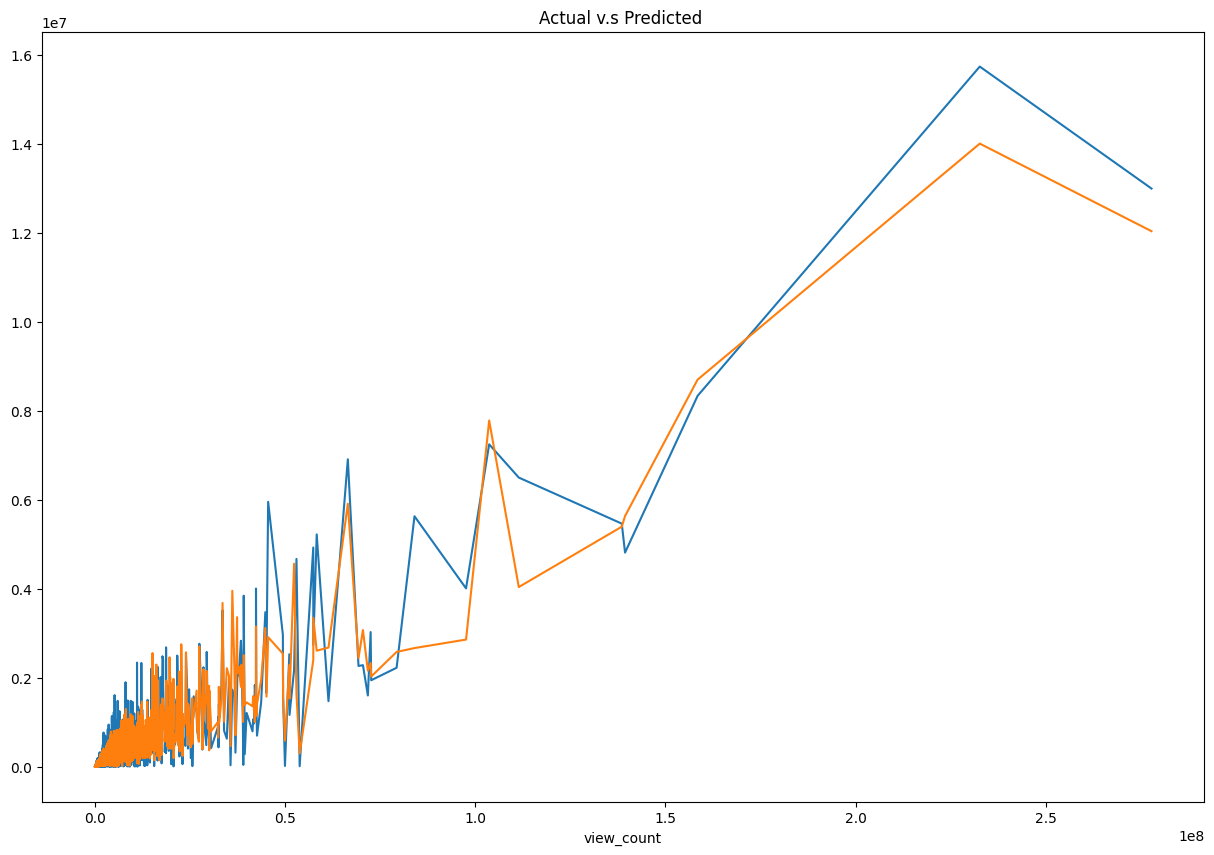

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(x = X_test['view_count'],y = y_test.values)
sns.lineplot(x = X_test['view_count'],y = y_pred)
plt.title('Actual v.s Predicted ')

##### The Blue Line Indicating is Actual Likes Value from our test dataset and Here Orange Line Indicating the Predicted Likes value from our test dataset , we can clearly conclude that our Linear Regression Model is performing pretty much well on this dataset